In [1]:
import os
os.chdir(os.getcwd() + '/../../')

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.bert_utils import *

# specify GPU
device = torch.device("cuda")

In [3]:
comments = pd.read_csv('data/comments/preprocessed_comments.csv', index_col=0)
comments = comments.dropna()
comments.head()

,toxic,comment_text
0,0,explanation why the edits make under my userna...
1,0,d'aww ! he match this background colour i be s...
2,0,"hey man , i be really not try to edit war . it..."
3,0,`` more i can not make any real suggestion on ...
4,0,"you , sir , be my hero . any chance you rememb..."


In [4]:
values = comments.groupby('toxic').count()['comment_text']
values

toxic
0    144277
1     15294
Name: comment_text, dtype: int64

Text(0, 0.5, 'counts')

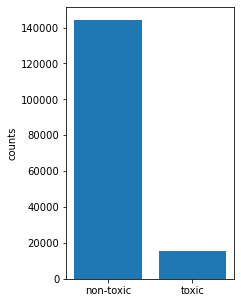

In [5]:
plt.figure(figsize=(3, 5))
plt.bar(['non-toxic', 'toxic'], values, align='center', alpha=1)
plt.ylabel('counts')

In [6]:
temp_text, test_text, temp_labels, test_labels = train_test_split(comments['comment_text'], 
                                                                  comments['toxic'], 
                                                                  random_state=0, 
                                                                  test_size=0.2, 
                                                                  stratify=comments['toxic'])


train_text, val_text, train_labels, val_labels = train_test_split(temp_text, 
                                                                  temp_labels, 
                                                                  random_state=0, 
                                                                  test_size=0.2, 
                                                                  stratify=temp_labels)

In [7]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Text(0, 0.5, 'frequency')

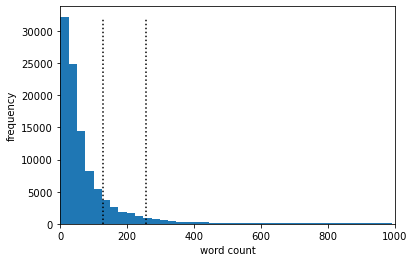

In [8]:
seq_len = [len(i.split()) for i in train_text]
plt.hist(seq_len, bins=200)
plt.vlines(256, 0, 32000, linestyles='dotted', color='k')
plt.vlines(128, 0, 32000, linestyles='dotted', color='k')
plt.xlim(0, 1000)
plt.xlabel('word count')
plt.ylabel('frequency')